# Symbolic computation of nonlinear saddle:

The goal is to create a vector field that has a closed-form expression for the FTLE field, but already displays nontrivial spatial dependence. In addition, we want to study the behavior of the MS and FTLE fields near the hyperbolic structure. 

Start with a simple system that has a closed form expression for the flowmap (and also the FTLE field).
$$\dot{x} = x-x^3  \\ \dot{y} = -y $$

For the flow map, we have

$$F_{t_0}^t(x_0,y_0) = \left(\frac{x_0}{\sqrt{x_0^2 + (1-x_0^2)e^{2(t-t_0)}}}, y_0e^{(t-t_0)} \right)$$.


From this, we can calculate the flow map gradient, and the Cauchy-Green strain tensor


$\nabla F_{t_0}^t(x_0,y_0)$ = 
\begin{bmatrix}
    \frac{\partial F_{t_0}^t(x_0,y_0)_1}{\partial x_0} & \frac{\partial F_{t_0}^t(x_0,y_0)_1}{\partial y_0} \\
    \frac{\partial F_{t_0}^t(x_0,y_0)_2}{\partial x_0} & \frac{\partial F_{t_0}^t(x_0,y_0)_2}{\partial y_0}
\end{bmatrix}

$$
C_{t_0}^t(x_0,y_0) = [\nabla F_{t_0}^t(x_0,y_0)]^T\nabla F_{t_0}^t(x_0,y_0).
$$

Its maximal eigenvalue gives the FTLE field:
$$
\lambda_2 = \frac{\text{tr}(C) + \sqrt{(\text{tr}(C)^2 - 4\text{det}(C)}}{2} \\
\text{FTLE}(t_0,t, x_0,y_0) = \frac{\text{log} \lambda_2}{2 (t-t_0)}
$$


In [1]:
from sympy import init_printing
init_printing()
import numpy as np

import matplotlib.pyplot as plt

In [2]:
from sympy import init_session
init_session()

IPython console for SymPy 1.4 (Python 3.7.4-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.4/



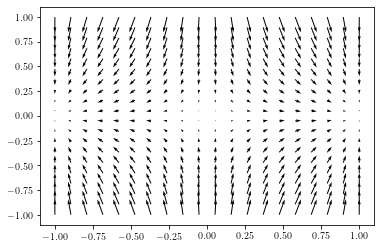

In [565]:
X, Y = np.meshgrid(np.linspace(-1, 1, 20), np.linspace(-1, 1, 20))
vx = X - X**3
vy = -Y
plt.quiver(X,Y, vx, vy)

In [322]:
## This is the flowmap for x' = x - x^3
x, t1, t2 = symbols('x t1 t2')
def FlowMapX(x, t1,t2):
    denom = sqrt(x**2 + (1 - x**2)*exp(-2*(t2-t1)))
    return x/denom
FlowMapX = FlowMapX(x, t1, t2)

## This is the flowmap for y' = -y
y = Symbol('y')
def FlowMapY(y, t1,t2):
    return y*exp(-(t2-t1))
FlowMapY = FlowMapY(y, t1, t2)




$$ 
F(x,y,t_1, t_2)_1 =
$$

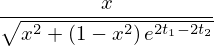

In [323]:
FlowMapX

$$ 
F(x,y,t_1, t_2)_2 =
$$

In [324]:
FlowMapY

In [325]:
fxx = simplify(diff(FlowMapX, x))
fxy = simplify(diff(FlowMapX, y))
fyx = diff(FlowMapY, x)
fyy = simplify(diff(FlowMapY, y))

Flowmap Gradient is


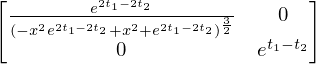

In [326]:
dF = Matrix([[fxx, fxy], [fyx, fyy]])
dF

Cauchy Green tensor

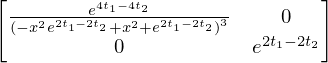

In [519]:
C = dF.T*dF
C

Eigenvalues, calculating it explicitly with the trace-determinant formula

In [520]:
tr = trace(C)
tr = simplify(tr)
determ = det(C)
determ = simplify(determ)

In [521]:
lambdaMax = (tr + sqrt(tr**2 - 4*determ))/2

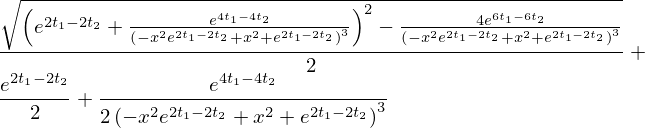

In [522]:
lambdaMax

In [328]:
lmax = C[0,0]
lmax.free_symbols

lmin = C[1,1]

In [267]:
lmin.free_symbols

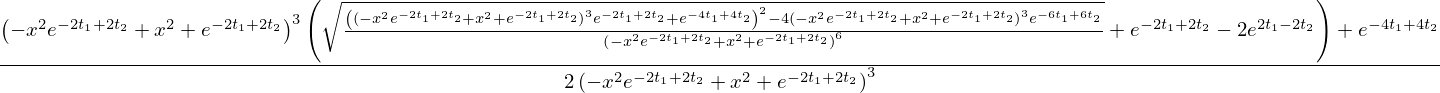

In [202]:
simplify(lambdaMax - lmin)

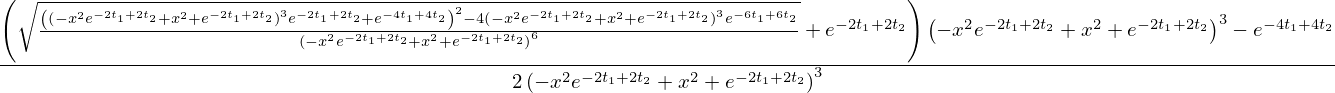

In [203]:
simplify(lambdaMax - lmax)

In [368]:
f1 = lambdify((t1,t2,x,y), lmax, 'numpy')
f2 = lambdify((t1,t2,x,y), lmin, 'numpy')
flm = lambdify((t1,t2,x,y), lambdaMax, 'numpy')

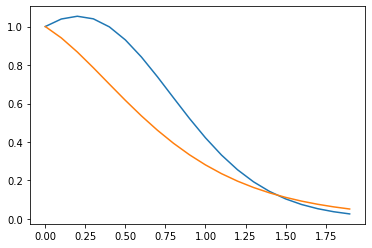

In [276]:
times = np.arange(0, 2, 0.1)
plt.plot(times, f1(0, times, 0.5, 0.5), '-')
plt.plot(times, f2(0, times, 0.5, 0.5), '-')



Creating meshgrid for visuals. Display on a grid of 1000 by 1000.

In [362]:
nx, ny = (100, 100)
xx = np.linspace(-1, 1, nx)
yy = np.linspace(-1, 1, ny)
X, Y = np.meshgrid(xx, yy)

Calculating FTLE values for $t_0=0, t=2$. Saving the result in a matrix for MATLAB processing

In [370]:
time = 2
FTLE = np.log(np.maximum(f1(0,time, X,Y), f2(0,time, X,Y)))/(2*time)
FTLE2 = np.log(flm(0,time,X,Y))/(2*time)

In [371]:
%matplotlib inline

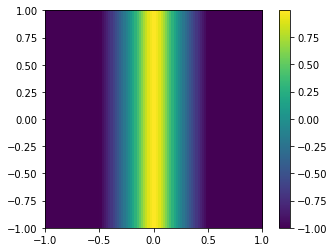

In [372]:
plt.imshow(FTLE, origin='middle', extent=[-1, 1, -1, 1])
plt.colorbar()

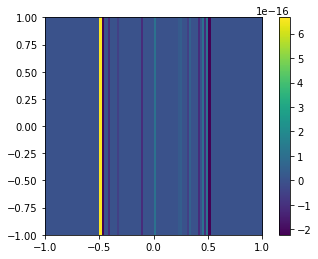

In [375]:
plt.imshow(FTLE2-FTLE, origin='middle', extent=[-1, 1, -1, 1])
plt.colorbar()



## Transformation of the vectorfield 

The vector field transforms according to 

$$
\dot{(u,v)} = (\nabla w)^{-1} f(w(u,v)).
$$

Substituting the specific transformation and original vector fields:

$$
\nabla w =$$
\begin{bmatrix}
    1 & -cos v \\
    0 & 1
\end{bmatrix} 
$$(\nabla w)^{-1} =$$ 
\begin{bmatrix}
    1 & cos v \\
    0 & 1
\end{bmatrix} 

$$
\dot{u} = u - \sin v - (u - \sin v)^3 + \cos v \\
\dot{v} = 1
$$

In [155]:
finiteDiff = np.loadtxt('FTLE_finiteDiff.txt')

Displaying the difference between the analytic and the finite difference FTLE fields

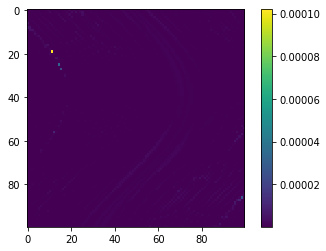

In [156]:
plt.imshow(np.abs(finiteDiff-FTLE))
plt.colorbar()

In [157]:
np.average(np.abs(finiteDiff-FTLE))

# Model Sensitvity

$$
\text{MS}^\tau (u_0,v_0) = \int_0^\tau \sqrt{\lambda_2[u(s),v(s)]} ds
$$

In [97]:
u0 = Symbol('u0')
v0 = Symbol('v0')
s = Symbol('s')
t = Symbol('t')
t0 = Symbol('t0')
us = FlowMapX.subs([(u, u0), (v, v0), (t1, t0), (t2, s)])
vs = FlowMapY.subs([(u, u0), (v, v0), (t1, t0), (t2, s)])

In [98]:
FlowMapX.free_symbols

In [99]:
us

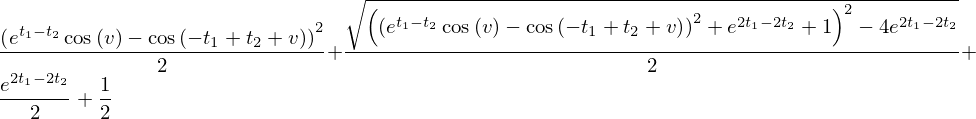

In [100]:
lambdaMax

In [101]:
lambdaAlongTraj = lambdaMax.subs([(u,us), (v,vs), (t1,s), (t2, t)])

In [518]:
lambdaAlongTraj

NameError: name 'lambdaAlongTraj' is not defined

In [103]:
lambdaAlongTraj.free_symbols

In [147]:
lambdaAlongTrajNumeric = lambdify((s,t,t0,u0,v0), lambdaAlongTraj, 'numpy')
lambdamaxNumeric = lambdify((t1,t2,u,v), lambdaMax, 'numpy')

In [175]:
integrate_times =np.linspace(0, 2, 200)
values = np.zeros((nx,ny,200))

In [174]:
nx, ny = (100, 100)
unum = np.linspace(-2, 2,nx)
vnum = np.linspace(0,4,ny)
U, V = np.meshgrid(unum,vnum)

The pullback-FTLE is integrated:

$$
\text{MS}^\tau (u_0,v_0) = \int_0^\tau \sqrt{\lambda_2[u(s),v(s)]} ds = \int_0^\tau f(u_0,v_0,s,\tau) ds
$$
Checking that we recover the FTLE field as:
$$
\text{log}(f(u_0,v_0,0,\tau))/\tau = FTLE^\tau(u_0,v_0).
$$

In [142]:
lambdaAlongTrajNumeric(0,2,0,U,V)

array([[1.3084502 , 1.3084502 , 1.3084502 , 1.3084502 , 1.3084502 ,
        1.3084502 , 1.3084502 , 1.3084502 , 1.3084502 , 1.3084502 ],
       [1.79820876, 1.79820876, 1.79820876, 1.79820876, 1.79820876,
        1.79820876, 1.79820876, 1.79820876, 1.79820876, 1.79820876],
       [2.11961781, 2.11961781, 2.11961781, 2.11961781, 2.11961781,
        2.11961781, 2.11961781, 2.11961781, 2.11961781, 2.11961781],
       [2.03652448, 2.03652448, 2.03652448, 2.03652448, 2.03652448,
        2.03652448, 2.03652448, 2.03652448, 2.03652448, 2.03652448],
       [1.60997827, 1.60997827, 1.60997827, 1.60997827, 1.60997827,
        1.60997827, 1.60997827, 1.60997827, 1.60997827, 1.60997827],
       [1.15353829, 1.15353829, 1.15353829, 1.15353829, 1.15353829,
        1.15353829, 1.15353829, 1.15353829, 1.15353829, 1.15353829],
       [1.00567613, 1.00567613, 1.00567613, 1.00567613, 1.00567613,
        1.00567613, 1.00567613, 1.00567613, 1.00567613, 1.00567613],
       [1.27805105, 1.27805105, 1.2780510

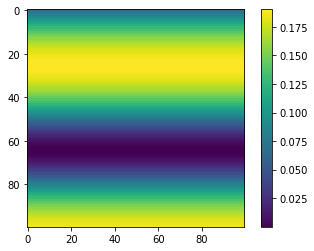

In [181]:
ftle2 = lambdamaxNumeric(0,2,U,V)
ftle2 = np.log(ftle2)/4
plt.imshow(ftle2)
plt.colorbar()

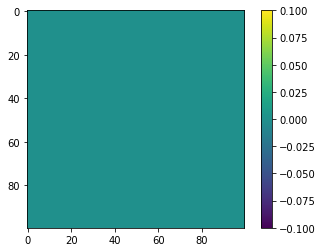

In [188]:
eov = np.loadtxt('FTLE_eovLin_alt.txt')
eov2 = np.loadtxt('FTLE_eovLin.txt')
plt.imshow(np.abs(eov-eov2))
plt.colorbar()

In [122]:
lambdaAlongTrajNumeric

<function _lambdifygenerated(s, t, t0, u0, v0)>

Evaluating the function at fixed time instants

In [176]:
for i in range(200):
    values[:,:,i] = np.sqrt(lambdaAlongTrajNumeric(integrate_times[i],2,0,U,V))

In [171]:
integrate_times[9]

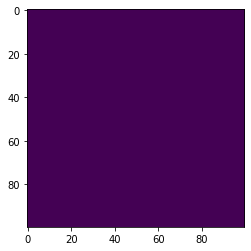

In [138]:
plt.imshow(values[:,:,9]) ##Checking that we recover the FTLE field again

Computing the model sensitivity through numerical integration

In [177]:
MS = np.trapz(values, x = integrate_times, axis = 2)

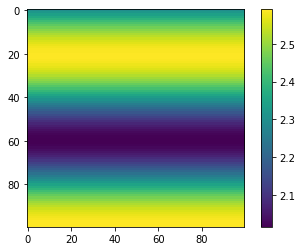

In [178]:
plt.imshow(MS)
plt.colorbar()

Loading numerical results from matlab:

In [179]:
MSEov= np.loadtxt('MS_eovLin.txt')
MSFullEov = np.loadtxt('MSFull_eovLin.txt')



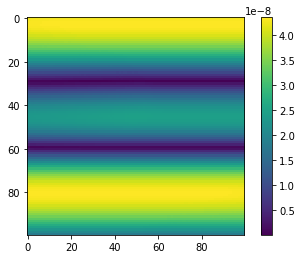

In [186]:
plt.imshow(np.abs(MSEov-MS))
#plt.title("Difference between analytic and Finite Difference Model Sens. fields")
plt.colorbar()

Approximation near a ridge:


In [523]:
x0 = Symbol('x0')
s = Symbol('s')
t = Symbol('t')
t0 = Symbol('t0')
epsilon = Symbol('epsilon')

xs = FlowMapX.subs([(x, x0), (t1, t0), (t2, s)])


In [526]:
lambdaMaxalongTraj = lambdaMax.subs([(x, xs), (t1,s), (t2, t)]) 
lmaxalongtraj = lmax.subs([(x,xs), (t1,s), (t2, t)])
lmaxalongtrajNumeric = lambdify((t0,s,t,x0), lmaxalongtraj, 'numpy')
lambdaMaxalongTrajNumeric = lambdify((t0,s,t,x0), lambdaMaxalongTraj, 'numpy')


In [510]:
lmaxalongtraj = simplify(lmaxalongtraj)
lmaxapprox = simplify(lmaxalongtraj.subs(x0, epsilon)) 


In [511]:
lmaxapprox0 = simplify(lmaxapprox.subs(epsilon, 0)) #Substitute eps = 0: FTLE on the ridge PRECISELY

In [512]:
lmaxapprox0

$$\lambda_{max}(t_0, t, s, x_0):= \lambda_{max}[C_s^t(F_{t_0}^s(x_0))]$$


$$ \lambda(\varepsilon, t_0,t,s) := \lambda_{max}(t_0, t, s, x_0)$$

$$ \lambda(\varepsilon, t_0,t,s)  = \lambda(0, t_0,t,s) + \varepsilon\frac{\partial \lambda(\varepsilon, t_0,t,s) }{\partial \varepsilon}_{\varepsilon = 0} + O(\varepsilon^2 = x_0^4)$$

In [513]:
deriv = simplify(diff(lmaxapprox, epsilon))

In [514]:
lmaxapprox1 = simplify(deriv.subs(epsilon, 0))

In [515]:
lmaxapprox1

In [516]:
lmaxapproxFirstOrder = simplify(lmaxapprox0 + epsilon*lmaxapprox1)

In [517]:
lmaxapproxFirstOrder

In [423]:
lmaxapproxNumeric = lambdify((t0,s,t,epsilon), lmaxapproxFirstOrder, 'numpy')


This is the FTLE along a trajectory. The value of the FTLE is: 

In [498]:
ftl = simplify(lmaxapproxFirstOrder.subs(s, t0))
ftlNumeric = lambdify((t0,t,epsilon), ftl, 'numpy')

In [502]:
ftl

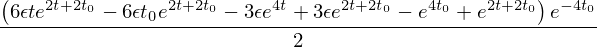

In [408]:
simplify(integrate(lmaxapproxFirstOrder, (s, t0, t)))

Is it true at all, that 

$$
\frac{\lambda_{max}(t_0, t, s, x_0)}{\lambda_{max}(t_0, t, t_0, x_0)}
$$

is independent of $x_0$?

To see, construct a 2 variable function in $(s, \varepsilon)$. Variation should only be in the s direction.

In [528]:
times = np.arange(0, 2, 0.01)

epsilons = np.arange(0, 0.2, 0.01)
inputsTime = np.zeros([len(epsilons), len(times) ])
inputsTime[:] = times

inputsEpsilons = np.zeros([len(times), len(epsilons)])
inputsEpsilons[:] = epsilons
inputsEpsilons = inputsEpsilons.T
inputsx0 = inputsEpsilons**2

x0s = np.sqrt(epsilons)

solutionsExact = lmaxalongtrajNumeric(0, inputsTime, 2, inputsx0)/lmaxalongtrajNumeric(0, 0, 2, inputsx0)
solutionsApprox = lmaxapproxNumeric(0, inputsTime, 2, inputsEpsilons)/lmaxapproxNumeric(0, 0, 2, inputsEpsilons)
solutionsBigFormula = lambdaMaxalongTrajNumeric(0, inputsTime, 2, inputsx0)/lambdaMaxalongTrajNumeric(0, 0, 2, inputsx0)



Visualizing on a surface plot:

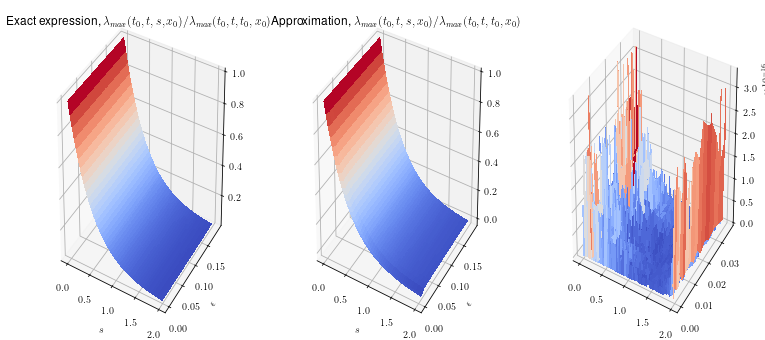

In [530]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

fig = plt.figure(figsize = (13, 6))
ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')



surf = ax1.plot_surface(inputsTime, inputsEpsilons , solutionsExact, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax1.set_title("Exact expression, $\lambda_{max}(t_0, t, s, x_0) / \lambda_{max}(t_0, t, t_0, x_0)$")
ax1.set_xlabel('$s$')
ax1.set_ylabel('$\epsilon$')

surf2 = ax2.plot_surface(inputsTime, inputsEpsilons , solutionsApprox, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax2.set_xlabel('$s$')
ax2.set_ylabel('$\epsilon$')


ax2.set_title("Approximation, $\lambda_{max}(t_0, t, s, x_0) / \lambda_{max}(t_0, t, t_0, x_0)$")


surf2 = ax3.plot_surface(inputsTime, inputsx0 , np.abs(solutionsBigFormula- solutionsExact), cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

Sections along t = const:

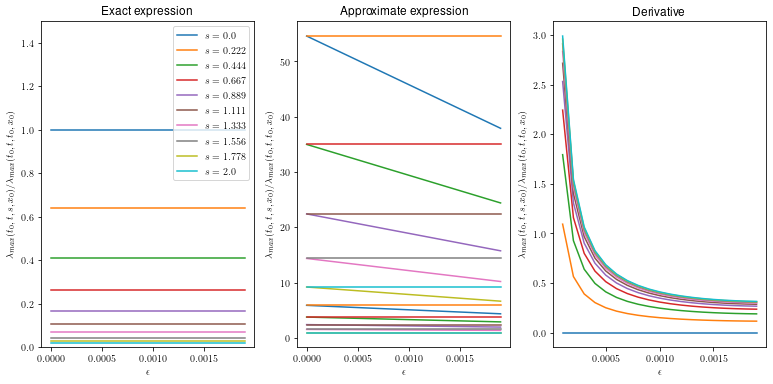

In [509]:
times_sparse = np.linspace(0, 2, 10)
epsilonsDense = np.arange(0, 0.002, 0.0001)
fig2 = plt.figure(figsize = (13, 6))
ax1 = fig2.add_subplot(131)
ax2 = fig2.add_subplot(132)

ax3 = fig2.add_subplot(133)

for tim in times_sparse:
    ax1.plot(epsilonsDense, lmaxalongtrajNumeric(0, tim, 2, epsilonsDense**2)/lmaxalongtrajNumeric(0, 0, 2, epsilonsDense**2), '-', label = '$s = %s$' %round(tim, 3))
    ax2.plot(epsilonsDense, lmaxapproxNumeric(0, tim, 2, epsilonsDense), '-')
    ax2.plot(epsilonsDense, lmaxalongtrajNumeric(0, tim, 2, epsilonsDense**2), '-')


    ax3.plot(epsilonsDense[1:], np.diff(lmaxapproxNumeric(0, tim, 2, epsilonsDense)/lmaxapproxNumeric(0, 0, 2, epsilonsDense))/epsilonsDense[1:], '-')
    
ax1.legend(loc='best')
ax1.set_xlabel('$\epsilon$')
ax2.set_xlabel('$\epsilon$')
ax3.set_xlabel('$\epsilon$')


ax2.set_ylabel('$\lambda_{max}(t_0, t, s, x_0) / \lambda_{max}(t_0, t, t_0, x_0)$')
ax1.set_ylabel('$\lambda_{max}(t_0, t, s, x_0) / \lambda_{max}(t_0, t, t_0, x_0)$')
ax3.set_ylabel('$\lambda_{max}(t_0, t, s, x_0) / \lambda_{max}(t_0, t, t_0, x_0)$')


ax1.set_title('Exact expression')
ax2.set_title('Approximate expression')
ax3.set_title('Derivative')


ax1.set_ylim(0, 1.5)
#ax2.set_ylim(0, 1.5)


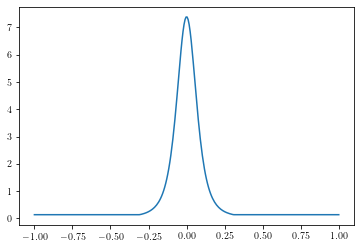

In [571]:
xline = np.linspace(-1, 1, 300)
plt.plot(xline, lambdaMaxalongTrajNumeric(0, 1, 2, xline))#lambdaMaxalongTrajNumeric(0, 0, 2, X))))


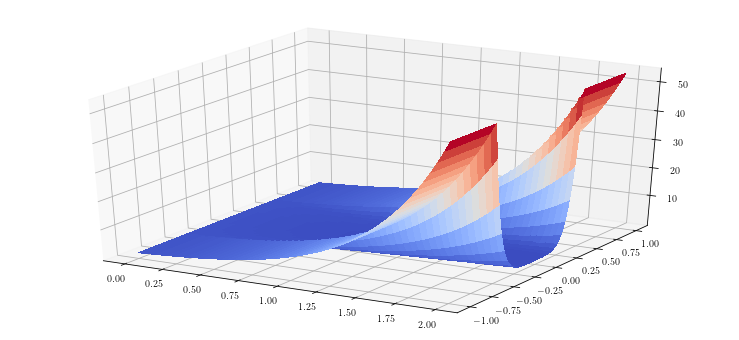

In [560]:
times = np.arange(0, 2, 0.01)

inputsTime = np.zeros([len(xline), len(times) ])
inputsTime[:] = times

inputsXs = np.zeros([len(times), len(xline)])
inputsXs[:] = xline
inputsXs = inputsXs.T

solutionsBigFormula = lambdaMaxalongTrajNumeric(0, inputsTime, 2, inputsXs)/lambdaMaxalongTrajNumeric(0, 0, 2, inputsXs)
fig = plt.figure(figsize = (13, 6))
ax1 = fig.add_subplot(111, projection='3d')
surf = ax1.plot_surface(inputsTime, inputsXs , solutionsBigFormula, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

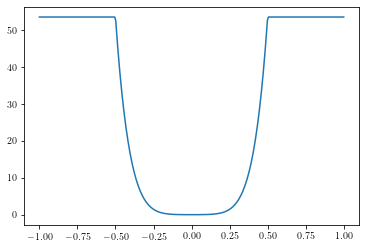

In [561]:
plt.plot(xline, lambdaMaxalongTrajNumeric(0, 1.99, 2, xline)/lambdaMaxalongTrajNumeric(0, 0, 2, xline))

In [546]:
X.shape

(array([3400.,  400.,  200.,  200.,  200.,  200.,    0.,  200.,    0.,
        5200.]),
 array([0.13560012, 0.86094572, 1.58629132, 2.31163692, 3.03698251,
        3.76232811, 4.48767371, 5.21301931, 5.9383649 , 6.6637105 ,
        7.3890561 ]),
 <a list of 10 Patch objects>)

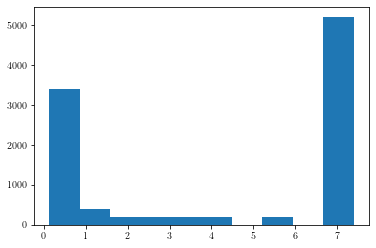

In [541]:
plt.hist(lambdaMaxalongTrajNumeric(0, 1, 2, X).flatten()/lambdaMaxalongTrajNumeric(0, 0, 2, X).flatten())